In [162]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt


In [163]:

log_file_path = ".\Druckversuch_data\Test.txt"
with open(log_file_path, 'r') as file:
    log_data = file.read()
    


In [164]:
# Filter out lines with unwanted values
filtered_lines = [line for line in log_data.split('\n') if not any(x in line for x in ['-1|-1|-1','-2|-2|-2', '-3|-3|-3'])]

In [165]:
#create a list to store datarows
rows =[line.split('|') for line in filtered_lines[1:]]
column_names = ['Zeit', 'Kraft', 'Abstand']

df = pd.DataFrame(rows, columns= column_names)
df

,Zeit,Kraft,Abstand
0,0.007,38.4366512298584,0.000147819519042969
1,0.018,39.4809246063232,-8.10623168945313E-05
2,0.029,39.5345687866211,6.19888305664063E-05
3,0.039,39.8790836334229,0.000147819519042969
4,0.049,41.729211807251,0.00158309936523438
...,...,...,...
4445,46.453,39.9661064147949,9.5367431640625E-05
4446,46.46,41.2958860397339,-0.00229835510253906
4447,46.472,40.7499074935913,-0.00296592712402344
4448,46.482,38.8741493225098,-0.00277996063232422


In [166]:
file_name = os.path.splitext(os.path.basename(log_file_path))[0]
file_name

'Test'

In [167]:
csv_file_path = f'.\Druckversuch_data\{file_name}.csv'
df.to_csv(csv_file_path, index=False)

In [168]:
df['Kraft'] = pd.to_numeric(df['Kraft'])
df['Abstand'] = pd.to_numeric(df['Abstand'])
df['Zeit'] = pd.to_numeric(df['Zeit'])

TypeError: 'float' object cannot be interpreted as an integer

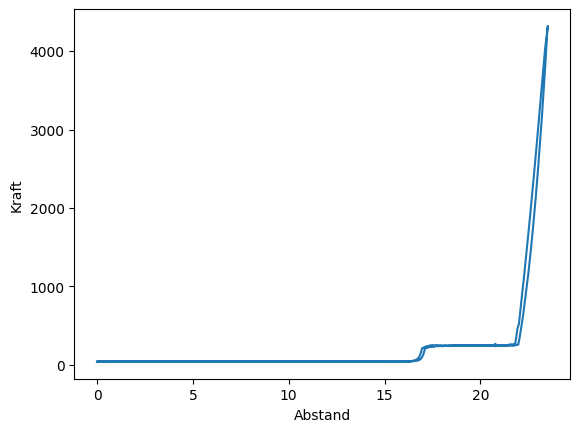

In [169]:
plt.plot(df['Abstand'], df['Kraft'], linestyle = '-')
plt.xlabel('Abstand')
plt.ylabel('Kraft')

# Set x-axis and y-axis grid resolution
plt.xticks(range(int(min(df['Abstand'])), int(max(df['Abstand'])) + 1, 5))
plt.yticks(range(int(min(df['Kraft'])), int(max(df['Kraft'])) + 1, 200))


plt.grid(True)
